In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
titanic = pd.read_csv('titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic["Fare"].mean()

np.float64(32.204207968574636)

In [3]:
titanic["Age"].median()

28.0

In [4]:
titanic["Embarked"].mode() #가장 많은 값을 가진 값을 출력

0    S
Name: Embarked, dtype: object

In [5]:
titanic["Fare"].std() #std 표준편차를 알아보는

49.693428597180905

Text(0, 0.5, '빈도수')

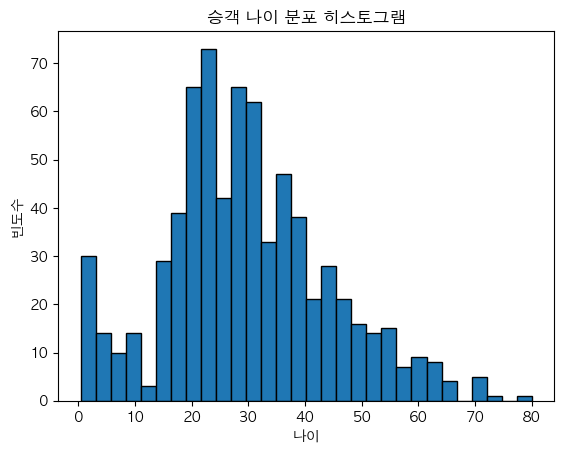

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.hist(titanic['Age'], bins=30, edgecolor='black')
plt.title('승객 나이 분포 히스토그램')
plt.xlabel('나이')
plt.ylabel('빈도수')

/var/folders/vl/8rb2p0yj5bl2022ynpwnjhxm0000gn/T/ipykernel_3675/892342374.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(titanic['Fare'].dropna(),


Text(0, 0.5, '나이')

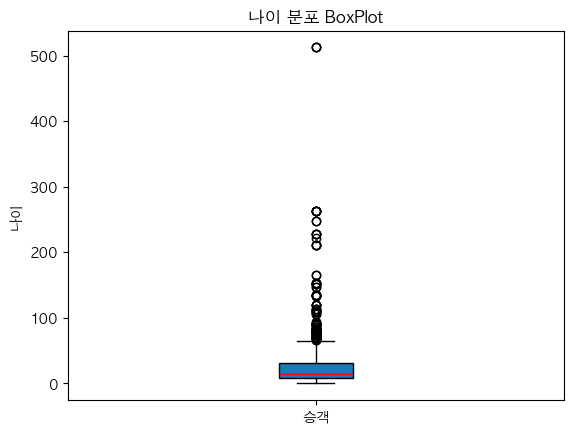

In [7]:
plt.boxplot(titanic['Fare'].dropna(),
            labels=['승객'],
            patch_artist=True,
            medianprops=dict(color='red'))
plt.title('나이 분포 BoxPlot')
plt.ylabel('나이')

/var/folders/vl/8rb2p0yj5bl2022ynpwnjhxm0000gn/T/ipykernel_3675/1416280424.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male['Age'].dropna(),


{'whiskers': [<matplotlib.lines.Line2D at 0x12ea5ead0>,
 'caps': [<matplotlib.lines.Line2D at 0x12ea5ed50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x12ea5e990>,
 'medians': [<matplotlib.lines.Line2D at 0x12ea5efd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12ea5f110>,
 'means': []}

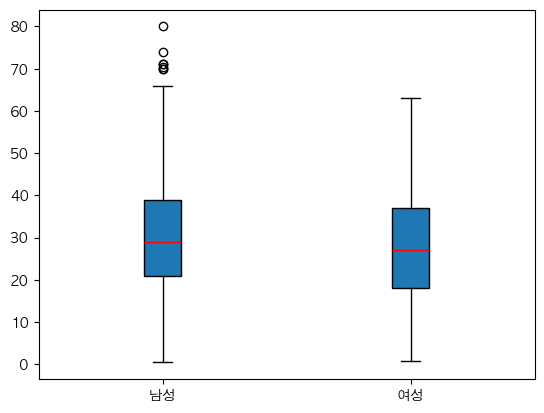

In [8]:
male = titanic[titanic['Sex'] == 'male']
female = titanic[titanic['Sex'] == 'female']
plt.boxplot([male['Age'].dropna(),
            female['Age'].dropna()],
            labels=['남성','여성'],
            patch_artist=True,
            medianprops=dict(color='red')
           )

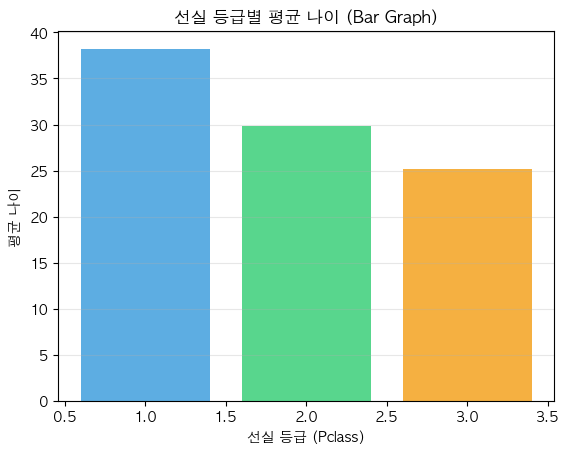

In [9]:
pclass_mean_age = titanic.groupby('Pclass')['Age'].mean()

plt.bar(pclass_mean_age.index, pclass_mean_age.values, color=['#5DADE2', '#58D68D', '#F5B041'])
plt.title('선실 등급별 평균 나이 (Bar Graph)')
plt.xlabel('선실 등급 (Pclass)')
plt.ylabel('평균 나이')
plt.grid(axis='y', alpha=0.3)

plt.show()

In [10]:
gr = titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()
gr

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [11]:
gr.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['Sex', 'Pclass'])

In [12]:
idx = []
for c, s in gr.index:
    idx.append(f"{s}등급 {c}")
print(idx)

['1등급 female', '2등급 female', '3등급 female', '1등급 male', '2등급 male', '3등급 male']


<BarContainer object of 6 artists>

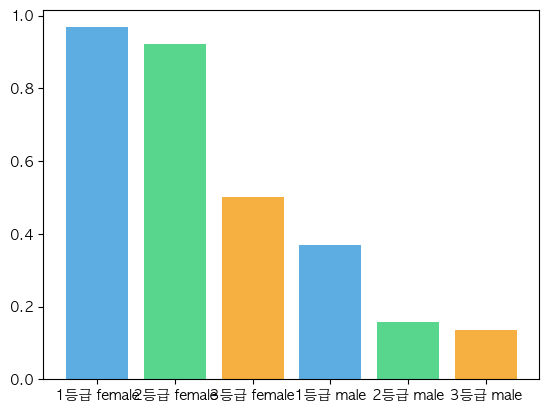

In [13]:
plt.bar(idx, gr.values, color=['#5DADE2', '#58D68D', '#F5B041'])

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
titanic = pd.read_csv('titanic/train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
#corr 상관계수 구하는 -1에서 +1사이의 값
#피어슨 상관계수(두 변수의 선형 관계)
titanic[['Age', 'Fare', 'Pclass', 'Survived']].corr()

,Age,Fare,Pclass,Survived
Age,1.000000,0.096067,-0.369226,-0.077221
Fare,0.096067,1.000000,-0.549500,0.257307
Pclass,-0.369226,-0.549500,1.000000,-0.338481
Survived,-0.077221,0.257307,-0.338481,1.000000


In [20]:
#스피어만 상관계수(두 변수의 순서, 순위를 기반) 비선형 관계에 사용!
titanic[['Age', 'Fare', 'Pclass', 'Survived']].corr(method='spearman')

,Age,Fare,Pclass,Survived
Age,1.000000,0.135051,-0.361666,-0.052565
Fare,0.135051,1.000000,-0.688032,0.323736
Pclass,-0.361666,-0.688032,1.000000,-0.339668
Survived,-0.052565,0.323736,-0.339668,1.000000


In [30]:
from scipy.stats import chi2, chi2_contingency

table = pd.crosstab(titanic['Sex'], titanic['Survived'])
table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [31]:
chi2_stat, p, dof, expected = chi2_contingency(table)

print("카이제곱: ", chi2_stat)
print("p-value: ", p)
print("자유도: ", dof)
print("기대도수: ", expected)

카이제곱:  260.71702016732104
p-value:  1.1973570627755645e-58
자유도:  1
기대도수:  [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


([<matplotlib.axis.YTick at 0x1333fc190>,
 [Text(0, 0, 'PassengerId'),
  Text(0, 1, 'Survived'),
  Text(0, 2, 'Pclass'),
  Text(0, 3, 'Age'),
  Text(0, 4, 'SibSp'),
  Text(0, 5, 'Parch'),
  Text(0, 6, 'Fare')])

/opt/anaconda3/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


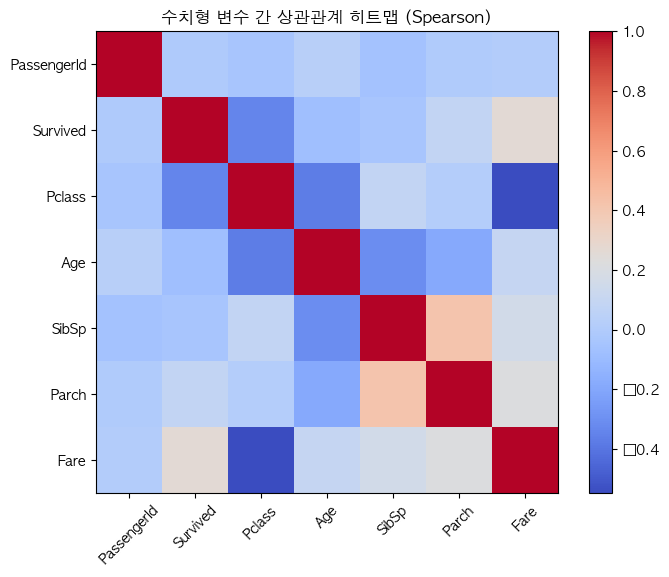

In [36]:
import matplotlib.pyplot as plt

num_df = titanic.select_dtypes(include=[np.number])

corr = num_df.corr(method='pearson')

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()

plt.title('수치형 변수 간 상관관계 히트맵 (Spearson)')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)